In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from pprint import pprint
from sklearn.decomposition import PCA
import random
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier

# Data

In [10]:
cdata = pd.read_csv('../features/features_larger_rock_jazz.csv').dropna()

# Test and Train Data

In [17]:
X_train, y_train = [], []
X_test, y_test = [], []

#data = cdata.sample(frac=1)

X = cdata[cdata.columns[0:10]]
y = cdata[cdata.columns[10]]

X_train, X_test, y_train, y_test = train_test_split(X, y, )

#for _ in range(0,100):
#X_train, X_test, y_train, y_test = train_test_split(X, y, )

# Random Forest

Accuracy: 0.7450477952513105 (0.05749901266378946)


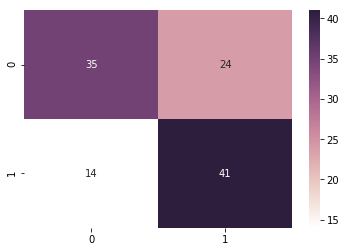

In [26]:
clf = RandomForestClassifier(max_depth=5, max_features=None, random_state=0)    
scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

clabels = ['Rock', 'Jazz']
#clabels = ['Classical', 'American Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=['Rock', 'Jazz'])
    
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True))

# AdaBoost

Accuracy: 0.6945205057045944 (0.0691845130571548)


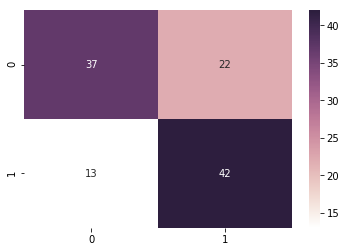

In [21]:
clf = AdaBoostClassifier()
scores = cross_val_score(clf, X, y, cv=10, random_state=0)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

clabels = ['Rock', 'Jazz']
#clabels = ['Classical', 'American Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=['Rock', 'Jazz'])
    
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True))

# SVM

Accuracy: 0.6484232706341866 (0.06385187756566506)


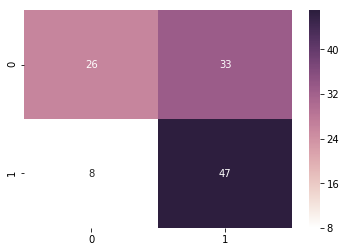

In [27]:
clf = svm.SVC(kernel='rbf', probability=False, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

clabels = ['Rock', 'Jazz']
#clabels = ['Classical', 'American Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=['Rock', 'Jazz'])
    
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True))

# Neural Network

Accuracy: 0.7052009456264775 (0.06045945513584915)


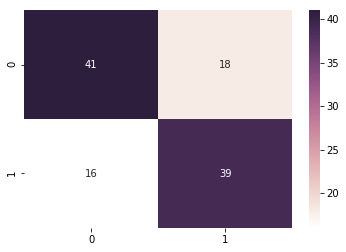

In [28]:
clf = clf = MLPClassifier(solver='lbfgs', activation='tanh', alpha=0.0001, hidden_layer_sizes=(5),\
                              learning_rate_init = 0.001, max_iter=2000, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

clabels = ['Rock', 'Jazz']
#clabels = ['Classical', 'American Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=['Rock', 'Jazz'])
    
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True))

## Number of Components vs Variation

In [59]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
print(pca.explained_variance_ratio_ )

[5.86866960e-01 2.73633404e-01 7.86054545e-02 3.62358292e-02
 1.06750067e-02 8.14013262e-03 4.84791690e-03 6.21116510e-04
 3.21879279e-04 5.23003350e-05]


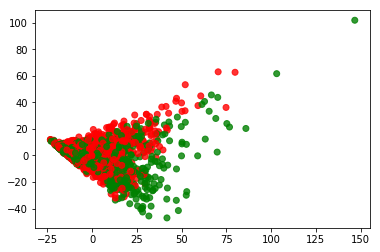

In [38]:
X_p = pca.transform(X)
X_p = np.transpose(X_p)
y_p = np.transpose(y)

#color = {'American Folk': 'red', 'Classical': 'green', 'Rock': 'blue', 'Jazz': 'yellow', 'Pop': 'purple'}
color = {'American Folk': 'red', 'Classical': 'green'}

y_color = [color[i] for i in y_p]

sns.regplot(x=X_p[0], y=X_p[1], fit_reg=False, scatter_kws={"color": y_color})